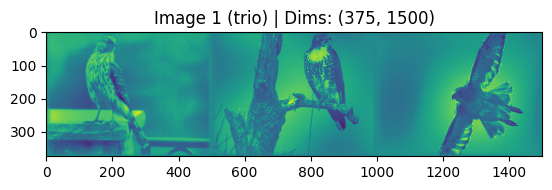

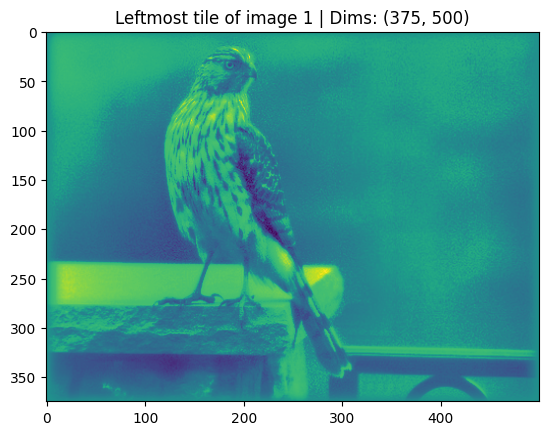

In [14]:
### Load and check the image data

from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import Normalize, Compose, Resize
from torchvision import utils as torch_utils
import torch
from torch.utils.data import TensorDataset, DataLoader

PATH_TO_DATA = '../../data/selection1866'

# Check data can be loaded and is as expected
file_1 = loadmat(os.path.join(PATH_TO_DATA, 'img1.mat'))
raw_img_1 = file_1['img']

plt.imshow(raw_img_1)
plt.title("Image 1 (trio) | Dims: {}".format(raw_img_1.shape))
plt.show()

plt.imshow(raw_img_1[:, :500])
plt.title("Leftmost tile of image 1 | Dims: {}".format(raw_img_1[:, :500].shape))
plt.show()

In [ ]:
### Preprocess images for SimCLR

file_list = sorted(f for f in os.listdir(PATH_TO_DATA) if f.endswith('.mat'))

preprocessing = Compose([
    # Resize((96, 96)),
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

img_tensors,labels = [], []
for idx, filename in enumerate(file_list):
    data = loadmat(os.path.join(PATH_TO_DATA, filename))
    
    img = data['img'][:, :500] # Take leftmost part of the image
    rgb_img = np.stack([img] * 3, axis=-1) # Convert grayscale to RGB for SimCLR
    tensor = torch.tensor(rgb_img, dtype=torch.float32).permute(2, 0, 1) # Shape (C, H, W)
    processed_tensor = preprocessing(tensor) # Normalize and resize for SimCLR
    
    img_tensors.append(processed_tensor)
    labels.append(idx)

dataset = TensorDataset(torch.stack(img_tensors), torch.tensor(labels))

images, labels = dataset
print("Labels:", labels)
print("Processed dataset shape:", images.shape)  # Shape: (N, C, 96, 96)

# Show a sample of processed images
img_grid = torch_utils.make_grid(images[:12], nrow=6, normalize=True, pad_value=0.9)
img_grid = img_grid.permute(1, 2, 0).numpy()
plt.figure(figsize=(10, 5))
plt.title('Processed images: sample')
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()